In [2]:

import warnings
warnings.filterwarnings('ignore')
import os
import re
import pickle
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from scipy.sparse import csr_matrix
from sklearn.datasets import fetch_20newsgroups, load_files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'

In [4]:
test_df=pd.read_csv('/content/test.csv')
test_df.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [3]:
train_df=pd.read_csv('/content/train.csv')
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [42]:
data.head()

,id,text,author,text_id,author_id
0,id26305,"This process, however, afforded me no means of...",EAP,"[26, 2945, 143, 1372, 22, 36, 294, 2, 7451, 1,...",0
1,id17569,It never once occurred to me that the fumbling...,HPL,"[11, 89, 125, 723, 4, 22, 9, 1, 5924, 79, 28, ...",1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[7, 15, 144, 173, 8, 5, 714, 4929, 560, 23, 18...",0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[121, 595, 25, 779, 16, 34, 212, 23, 696, 4246...",2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[1126, 166, 680, 20, 76, 714, 1, 4930, 1794, 1...",1


In [41]:
data.describe()

,author_id
count,19579.000000
mean,0.905205
std,0.838595
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [40]:
data.tail()

,id,text,author,text_id,author_id
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[6, 46, 31, 1130, 102, 6, 212, 21, 11, 9, 54, ...",0
19575,id08973,The lids clenched themselves together as if in...,EAP,"[1, 2616, 7330, 365, 396, 16, 62, 7, 5, 7596]",0
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[10440, 6083, 15918, 25943, 9, 25, 4, 128, 5, ...",0
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[17, 37, 4653, 2, 2703, 82, 26, 11, 9643, 84, ...",0
19578,id00393,"He laid a gnarled claw on my shoulder, and it ...",HPL,"[13, 1354, 5, 6664, 6557, 27, 10, 1670, 3, 11,...",1


In [39]:
data.isnull()

,id,text,author,text_id,author_id
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
19574,False,False,False,False,False
19575,False,False,False,False,False
19576,False,False,False,False,False
19577,False,False,False,False,False


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         19579 non-null  object
 1   text       19579 non-null  object
 2   author     19579 non-null  object
 3   text_id    19579 non-null  object
 4   author_id  19579 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 764.9+ KB


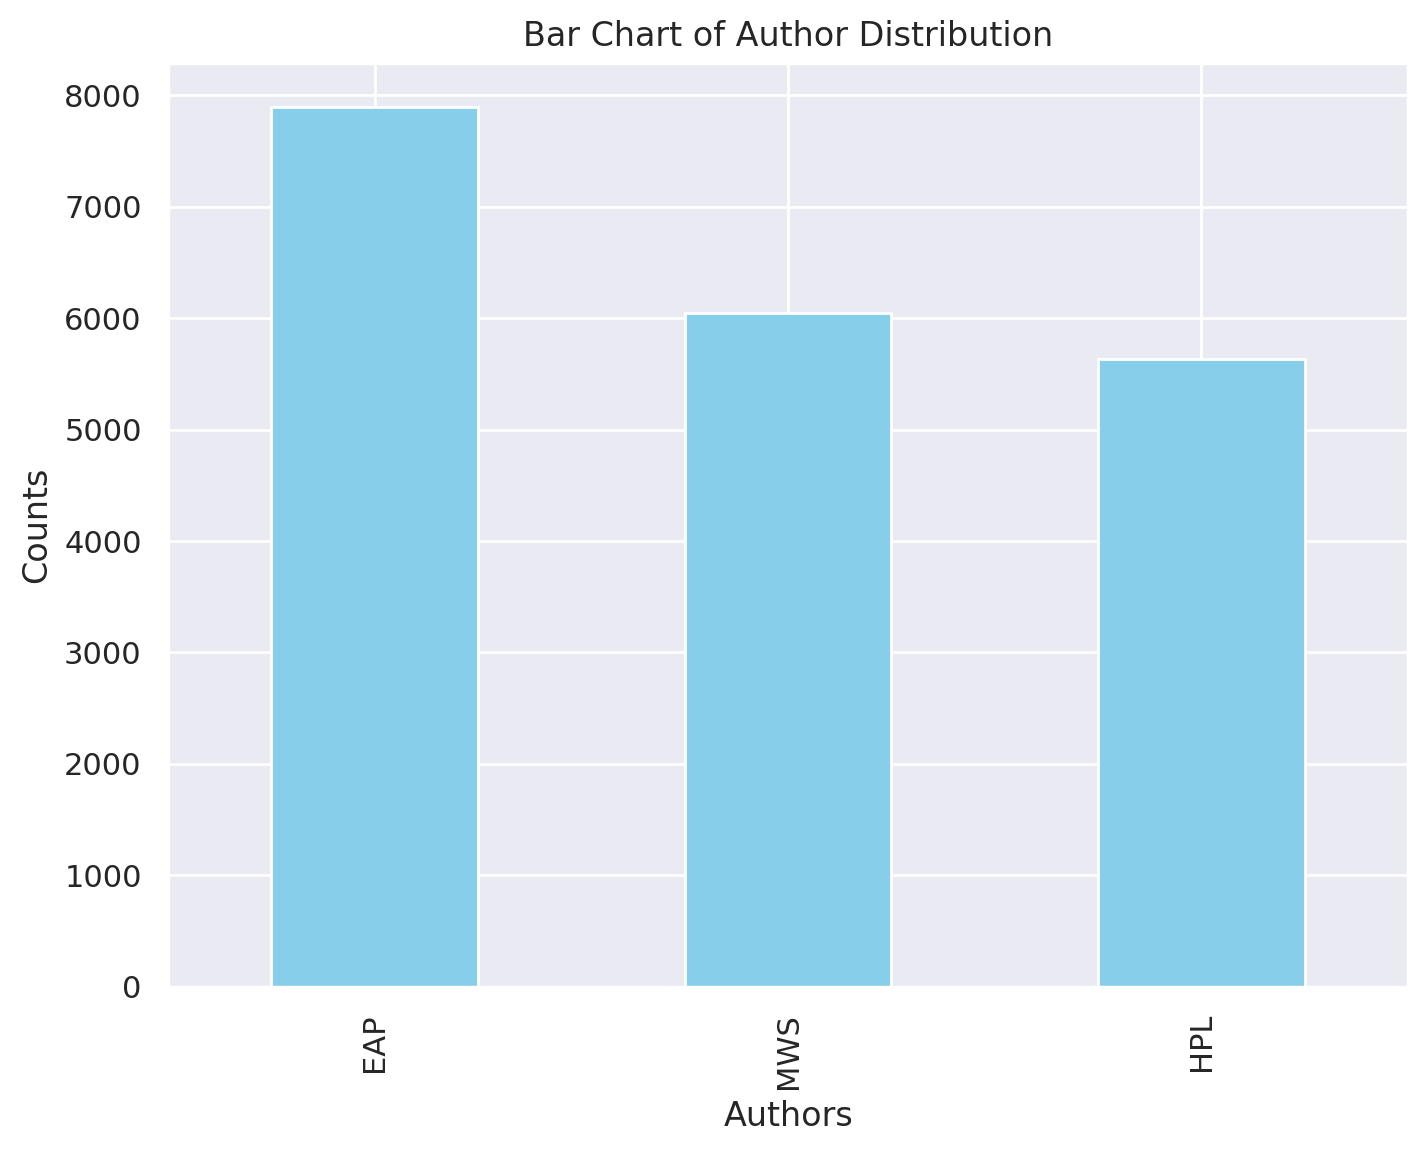

In [13]:
import matplotlib.pyplot as plt

# Assuming 'train_df' is your DataFrame
data = train_df['author'].value_counts()

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
data.plot(kind='bar', ax=ax, color='skyblue')

# Customize the plot
ax.set_title('Bar Chart of Author Distribution')
ax.set_xlabel('Authors')
ax.set_ylabel('Counts')

# Show the plot
plt.show()





In [14]:
import pickle
import joblib
joblib.dump(train_df, 'train_df.pkl')
joblib.dump(test_df, 'test_df.pkl')
joblib.dump(data, 'data.pkl')

['data.pkl']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['author'], test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [17]:
import string
import re

text=train_df['text'][0]


# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove whitespace
    text = text.strip()

    return text


In [19]:
import pickle

# Example dictionary to save
author_to_id = {
    "EAP": 1,
    "HPL": 2,
    "MWS": 3,

}

# Saving the dictionary to a file using pickle
with open('author_to_id.pickle', 'wb') as f:
    pickle.dump(author_to_id, f)

print("Dictionary saved to 'author_to_id.pickle'.")


Dictionary saved to 'author_to_id.pickle'.


In [20]:
import tensorflow as tf

# Create a new Tokenizer object
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Assuming train_df is your pandas DataFrame from the previous cells
tokenizer.fit_on_texts(train_df['text'])

# Display the word index (vocabulary)
print("Word Index:", tokenizer.word_index)

# Convert text data into sequences of integers
sequences = tokenizer.texts_to_sequences(train_df['text'])
print("Tokenized Sequences:", sequences)


Word Index: {'the': 1, 'of': 2, 'and': 3, 'to': 4, 'a': 5, 'i': 6, 'in': 7, 'was': 8, 'that': 9, 'my': 10, 'it': 11, 'had': 12, 'he': 13, 'with': 14, 'his': 15, 'as': 16, 'for': 17, 'which': 18, 'but': 19, 'not': 20, 'at': 21, 'me': 22, 'from': 23, 'by': 24, 'is': 25, 'this': 26, 'on': 27, 'be': 28, 'her': 29, 'were': 30, 'have': 31, 'all': 32, 'you': 33, 'we': 34, 'or': 35, 'no': 36, 'an': 37, 'one': 38, 'so': 39, 'him': 40, 'when': 41, 'been': 42, 'they': 43, 'upon': 44, 'there': 45, 'could': 46, 'she': 47, 'its': 48, 'would': 49, 'more': 50, 'now': 51, 'their': 52, 'what': 53, 'some': 54, 'our': 55, 'are': 56, 'into': 57, 'than': 58, 'will': 59, 'very': 60, 'who': 61, 'if': 62, 'them': 63, 'only': 64, 'then': 65, 'up': 66, 'these': 67, 'before': 68, 'about': 69, 'any': 70, 'time': 71, 'man': 72, 'yet': 73, 'out': 74, 'said': 75, 'even': 76, 'did': 77, 'your': 78, 'might': 79, 'after': 80, 'old': 81, 'like': 82, 'first': 83, 'us': 84, 'must': 85, 'most': 86, 'through': 87, 'over': 88

<Axes: >

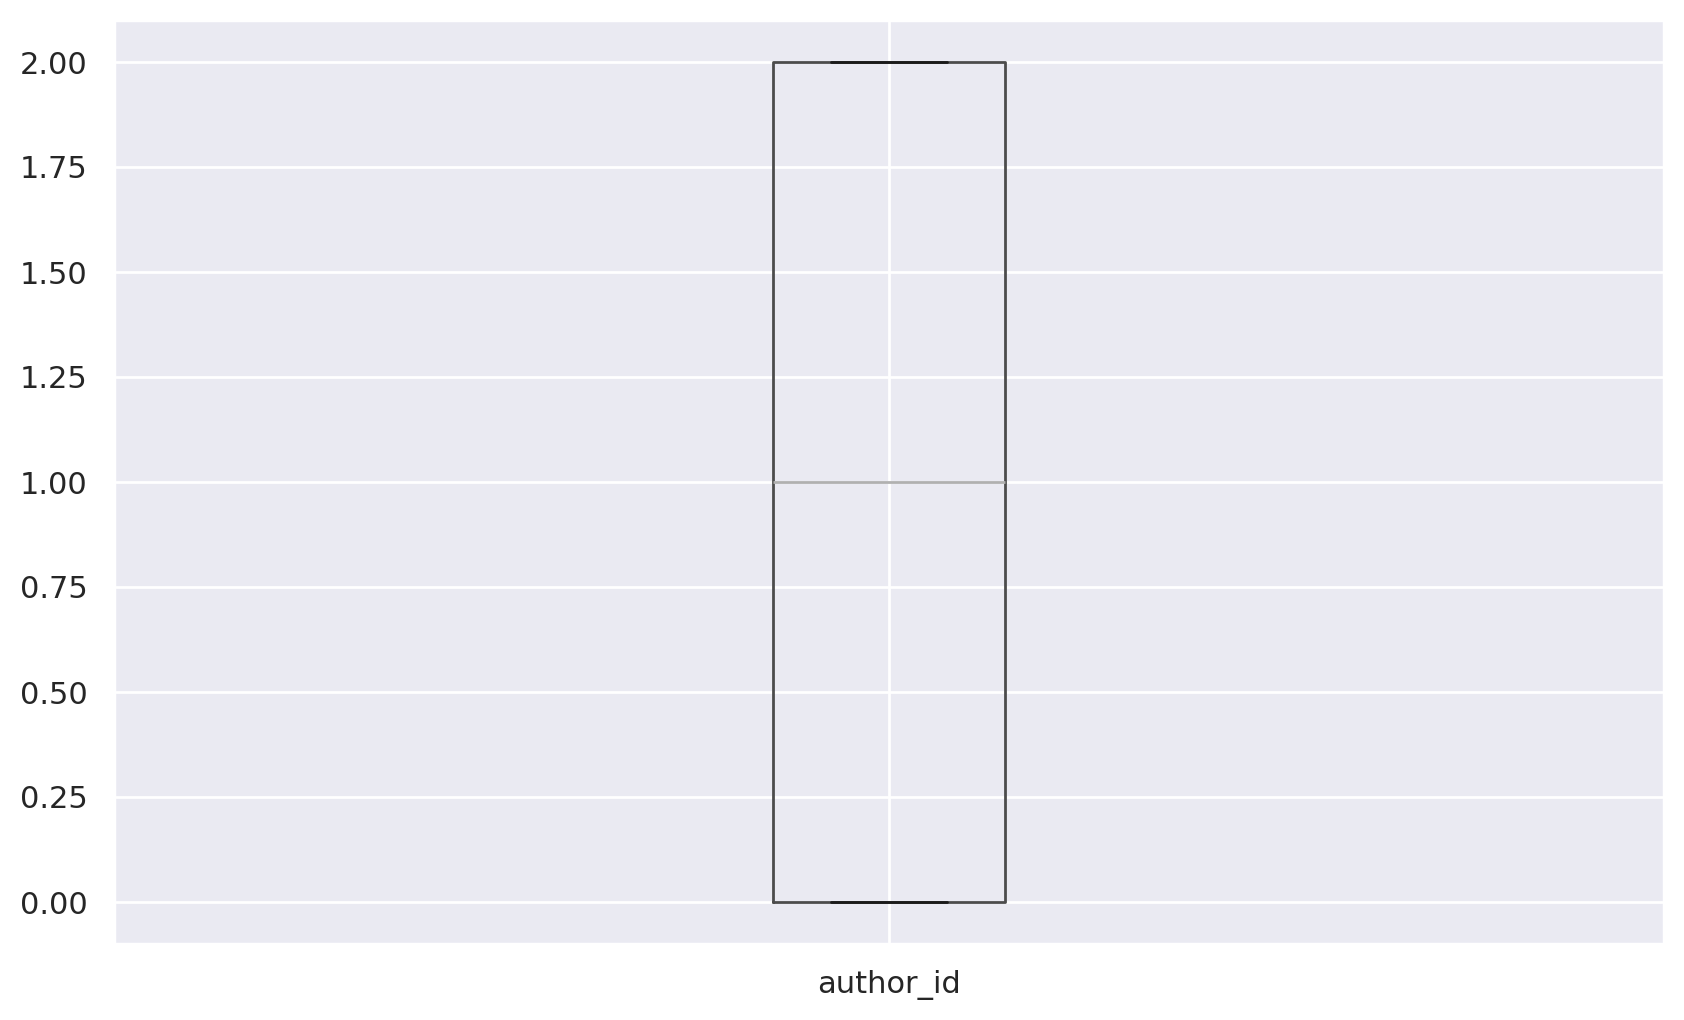

In [33]:
plt.figure(figsize=(10, 6))
data.boxplot ()

<Axes: >

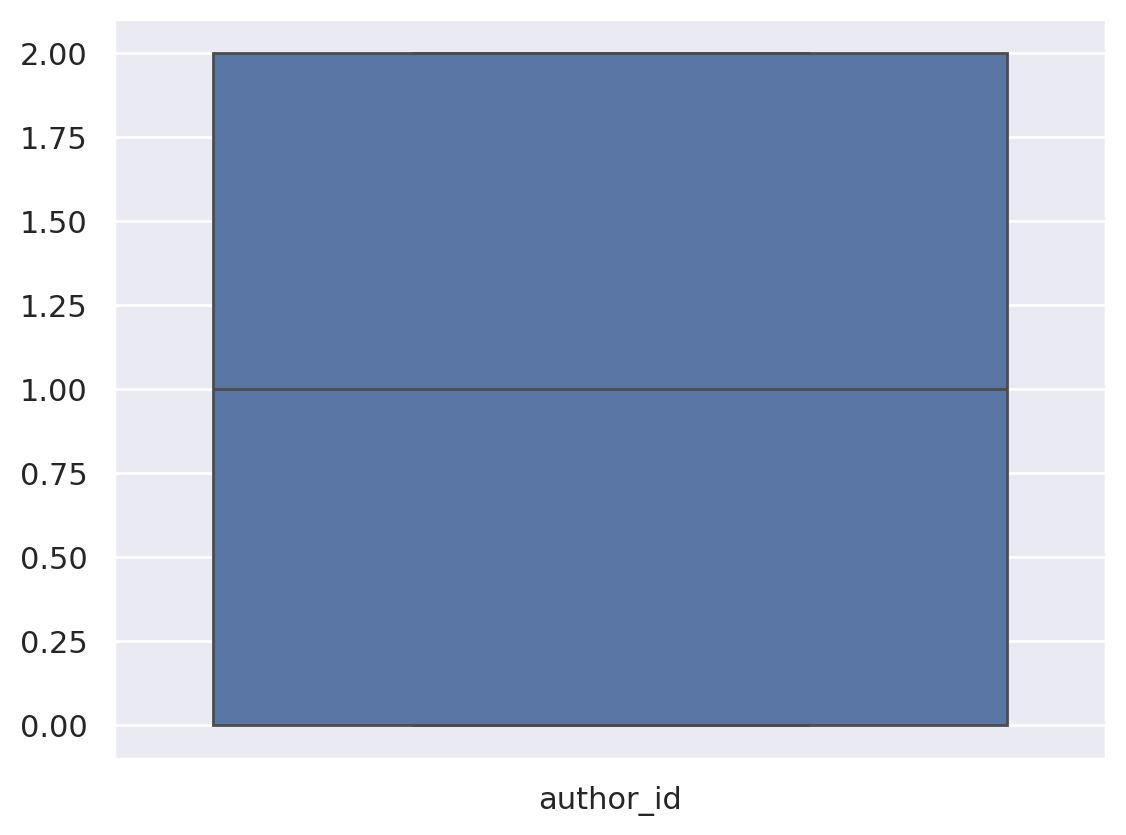

In [38]:
sns.boxplot(data=data)

            id                                               text  \
0      id26305  This process, however, afforded me no means of...   
1      id17569  It never once occurred to me that the fumbling...   
2      id11008  In his left hand was a gold snuff box, from wh...   
3      id27763  How lovely is spring As we looked from Windsor...   
4      id12958  Finding nothing else, not even gold, the Super...   
...        ...                                                ...   
19574  id17718  I could have fancied, while I looked at it, th...   
19575  id08973  The lids clenched themselves together as if in...   
19576  id05267  Mais il faut agir that is to say, a Frenchman ...   
19577  id17513  For an item of news like this, it strikes us i...   
19578  id00393  He laid a gnarled claw on my shoulder, and it ...   

                                                 text_id  
0      [26, 2945, 143, 1372, 22, 36, 294, 2, 7451, 1,...  
1      [11, 89, 125, 723, 4, 22, 9, 1, 5924, 79, 28, 

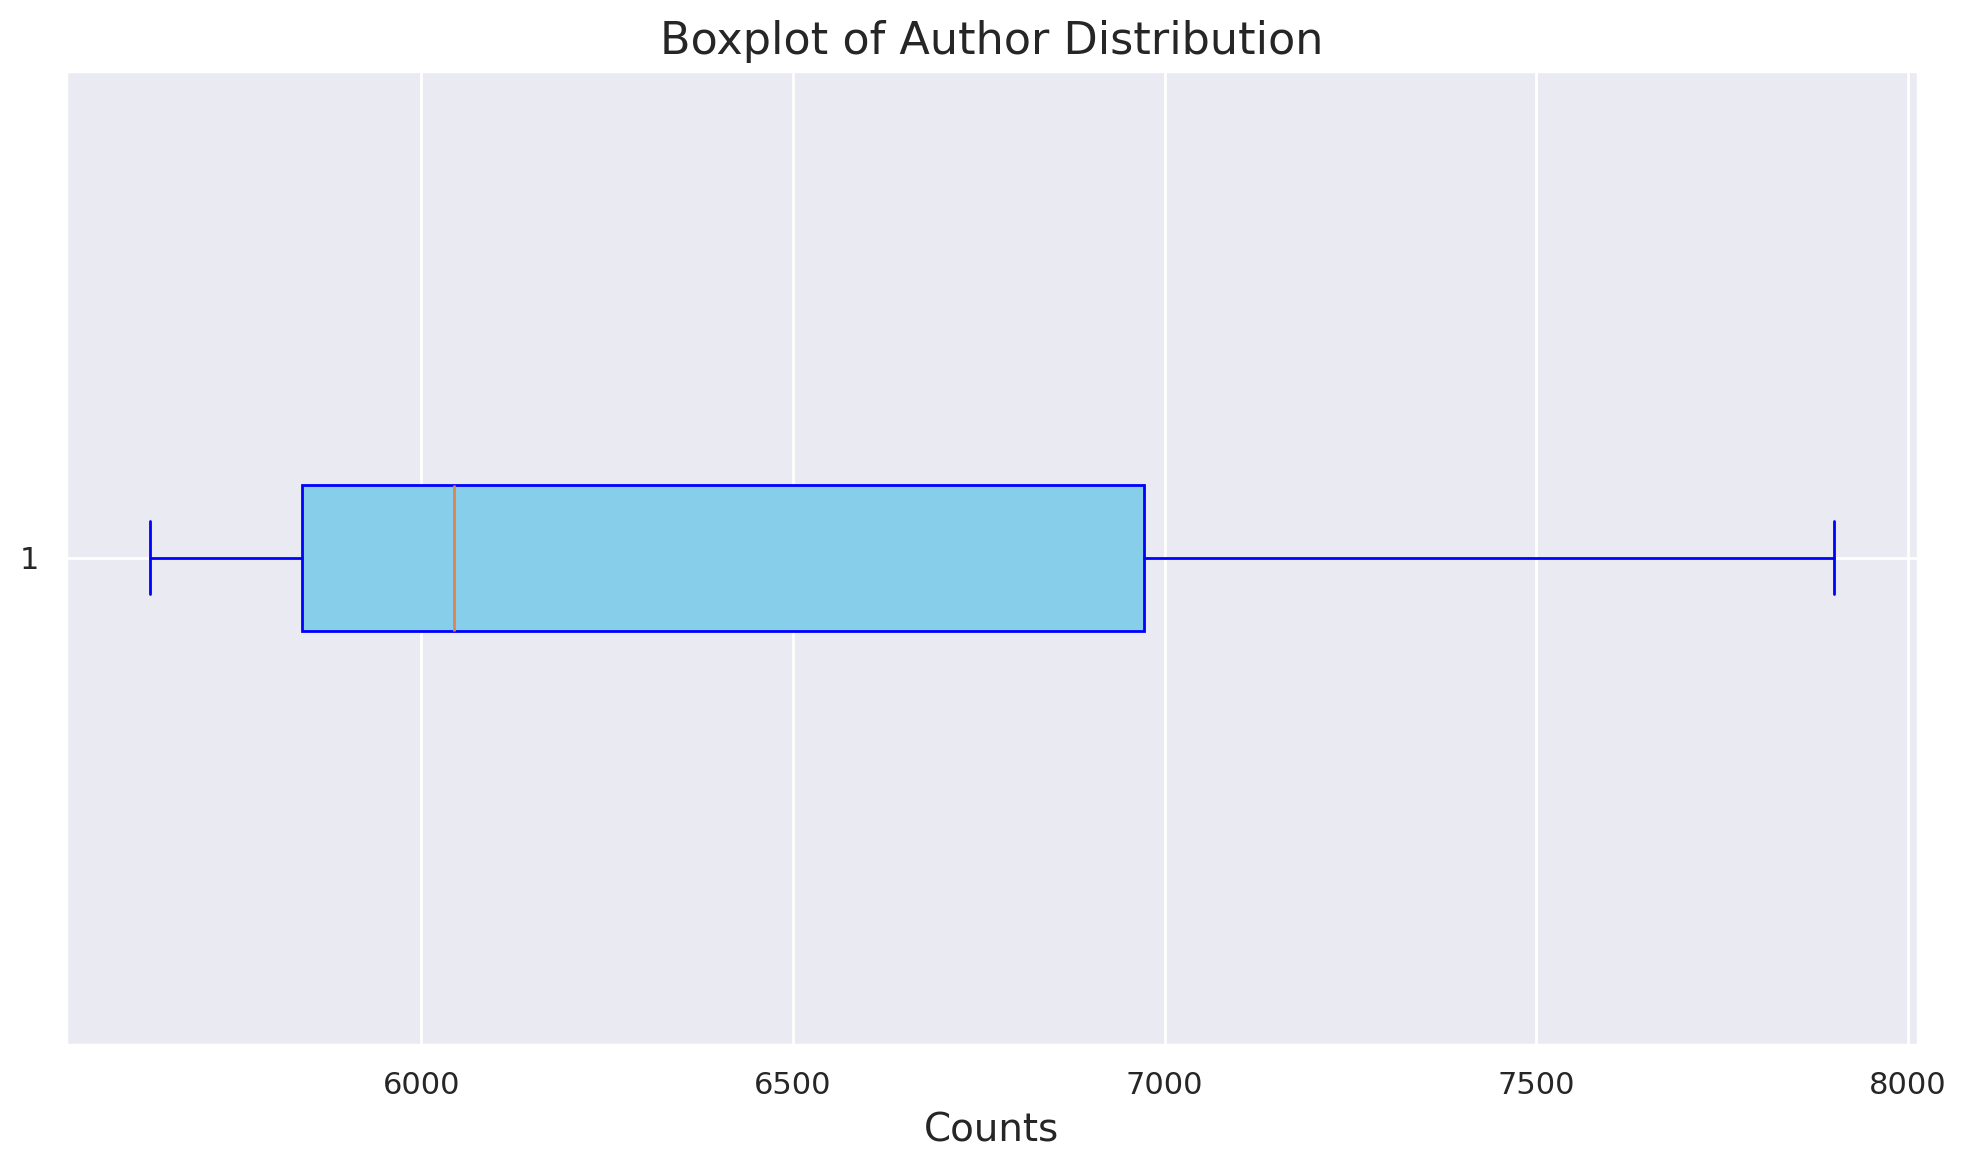

In [21]:
# Create a new Tokenizer object
import tensorflow as tf

# Instead of just selecting 'id', create a copy of the DataFrame with selected columns
data = train_df[['id', 'text']].copy()
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(data['text'])

# Add a new column with tokenized sequences
data['text_id'] = tokenizer.texts_to_sequences(data['text'])

# Display the DataFrame with the new column
print(data)


import matplotlib.pyplot as plt

# Get value counts for 'author' column
data = train_df['author'].value_counts()

# Create a boxplot for the distribution of counts (the values of 'data')
plt.figure(figsize=(10, 6))

# Boxplot of the counts of authors
plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

# Add titles and labels
plt.title('Boxplot of Author Distribution', fontsize=16)
plt.xlabel('Counts', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Create a new Tokenizer object
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Instead of just selecting 'id', 'text', select 'author' as well
data = train_df[['id', 'text', 'author']].copy()

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(data['text'])

# Add a new column with tokenized sequences
data['text_id'] = tokenizer.texts_to_sequences(data['text'])

# Pad the tokenized sequences to a fixed length (e.g., 300)
X = pad_sequences(data['text_id'], maxlen=300)

# Define the number of classes (unique authors)
author_names = ['EAP', 'HPL', 'MWS']  # Replace with your actual author names
num_classes = len(author_names)

# Assuming 'author' column contains author names (e.g., 'EAP', 'HPL', 'MWS')
# Create a mapping from author names to numerical IDs
author_to_id = {author: i for i, author in enumerate(author_names)}

# Add a new 'author_id' column with numerical IDs
data['author_id'] = data['author'].map(author_to_id)


# One-hot encode the author_id column
y = tf.keras.utils.to_categorical(data['author_id'], num_classes=num_classes)

# Display the prepared input (X) and output (y)
print("Padded Input Sequences (X):")
print(X)
print("One-Hot Encoded Labels (y):")
print(y)

Padded Input Sequences (X):
[[    0     0     0 ...    98     1   430]
 [    0     0     0 ...     5   417  2353]
 [    0     0     0 ...   345   477  2678]
 ...
 [    0     0     0 ...    89 15902 15524]
 [    0     0     0 ...    60  9384   528]
 [    0     0     0 ...     9     2  5991]]
One-Hot Encoded Labels (y):
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Replace 'train_data' with 'data', which is your DataFrame with 'text_id' column
X = pad_sequences(data['text_id'], maxlen=300)

# Similarly, replace 'train_data' with 'data' for 'author_id'
y = tf.keras.utils.to_categorical(data['author_id'], num_classes=len(author_names))

# Now you can split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [24]:
import tensorflow as tf

# Define the vocabulary size and sequence length
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token
embedding_dim = 128  # Dimensionality of the dense embedding space
sequence_length = 300  # Length of the input sequences after padding

# Initialize the Sequential model
model = tf.keras.Sequential([
    # Add an embedding layer
    tf.keras.layers.Embedding(
        input_dim=vocab_size,  # Size of the vocabulary
        output_dim=embedding_dim,  # Size of the embedding vectors
        input_length=sequence_length  # Length of the input sequences
    ),
    # Add other layers (for example, LSTM and Dense layers)
    tf.keras.layers.LSTM(128, return_sequences=True),  # LSTM layer with 128 units
    tf.keras.layers.GlobalMaxPooling1D(),  # Global max pooling to reduce sequence dimensions
    tf.keras.layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Display the model's architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
import tensorflow as tf

# Define the vocabulary size and sequence length
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token
embedding_dim = 128  # Dimensionality of the dense embedding space
sequence_length = 300  # Length of the input sequences after padding

# Initialize the Sequential model
model = tf.keras.Sequential([
    # Add an embedding layer
    tf.keras.layers.Embedding(
        input_dim=vocab_size,  # Size of the vocabulary
        output_dim=embedding_dim,  # Size of the embedding vectors
        input_length=sequence_length  # Length of the input sequences
    ),
    # Add a 1D Convolutional Layer
    tf.keras.layers.Conv1D(
        filters=128,  # Number of filters
        kernel_size=5,  # Size of the convolutional kernel
        activation='relu'  # ReLU activation function
    ),
    # Add a Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling1D(),
    # Add Dense Layers for classification
    tf.keras.layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Display the model's architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.regularizers import l2

# Define the model
model = tf.keras.Sequential([
    # Embedding Layer
    tf.keras.layers.Embedding(
        input_dim=vocab_size,  # Size of the vocabulary
        output_dim=embedding_dim,  # Embedding vector size
        input_length=sequence_length  # Input sequence length
    ),
    # Convolutional Layer
    tf.keras.layers.Conv1D(
        filters=128,  # Number of filters
        kernel_size=5,  # Filter size
        activation='relu'  # Activation function
    ),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling1D(),
    # Dense Layer with L2 Regularization
    tf.keras.layers.Dense(
        units=128,  # Number of units
        activation='relu',  # Activation function
        kernel_regularizer=l2(0.01)  # Apply L2 regularization
    ),
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    # Output Layer with L2 Regularization
    tf.keras.layers.Dense(
        units=len(author_names),  # Number of classes (authors)
        activation='softmax',  # Activation for multi-class classification
        kernel_regularizer=l2(0.01)  # Apply L2 regularization
    )
])

# Display the model's architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [28]:
model.fit(  X_train, y_train, validation_data=(X_val, y_val),epochs=10,batch_size=128)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 61s 479ms/step - accuracy: 0.4118 - loss: 1.8090 - val_accuracy: 0.5074 - val_loss: 1.0737
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 58s 471ms/step - accuracy: 0.5658 - loss: 1.0117 - val_accuracy: 0.6427 - val_loss: 0.8886
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 56s 457ms/step - accuracy: 0.7141 - loss: 0.7873 - val_accuracy: 0.7574 - val_loss: 0.7083
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 91s 533ms/step - accuracy: 0.8192 - loss: 0.5894 - val_accuracy: 0.7791 - val_loss: 0.6567
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 74s 469ms/step - accuracy: 0.8817 - loss: 0.4510 - val_accuracy: 0.7896 - val_loss: 0.6497
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 58s 469ms/step - accuracy: 0.9145 - loss: 0.3724 - val_accuracy: 0.8072 - val_loss: 0.6079
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 58s 468ms/step - accuracy: 0.9396 - loss: 0.3157 - val_accuracy: 0.8046 - val_loss: 0.6127
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 57s 465ms/step - accuracy: 0.9566 - loss: 0

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [30]:
print(X_train.shape)  # (15663, 300)
print(y_train.shape)  # (15663, 3)

(15663, 300)
(15663, 3)


In [31]:
test_df['text'] = test_df['text'].apply(preprocess_text)
test_df['text_id'] = tokenizer.texts_to_sequences(test_df['text'])


In [55]:
# Ensure all entries in 'text_id' are lists
test_df['text_id'] = [[x] if isinstance(x, int) else x for x in test_df['text_id']]

# Filter out any invalid or empty sequences
test_df['text_id'] = [seq for seq in test_df['text_id'] if isinstance(seq, list)]

# Pad sequences
padded_text = tf.keras.preprocessing.sequence.pad_sequences(test_df['text_id'], maxlen=300)

# Predict
y_pred = model.predict(np.asarray(padded_text))


263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step


In [56]:
y_pred

array([[0.32830974, 0.42775834, 0.24393189],
       [0.32830974, 0.42775834, 0.24393189],
       [0.32830974, 0.42775834, 0.24393189],
       ...,
       [0.32830974, 0.42775834, 0.24393189],
       [0.32830974, 0.42775834, 0.24393186],
       [0.32830974, 0.42775834, 0.24393186]], dtype=float32)

In [57]:
import numpy as np

# Example array of predicted probabilities
predictions = np.array([[0.35943833, 0.36758474, 0.272977],
                         [0.35943833, 0.36758474, 0.272977],
                         [0.35943833, 0.36758474, 0.272977]])

# Get the index of the highest probability in each row
predicted_classes = np.argmax(predictions, axis=1)

# Output the predicted class labels (assuming author names are in a list)
author_names = ['EAP', 'HPL', 'MWS']
predicted_author_names = [author_names[i] for i in predicted_classes]

print(predicted_author_names)


['HPL', 'HPL', 'HPL']


In [58]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example sentence to test
sentence = "This is a test sentence to predict the author."

# Step 1: Preprocess the sentence (apply the same preprocessing as done during training)
# Make sure the 'preprocess_text' function is defined correctly (e.g., removing punctuation, converting to lowercase)
processed_sentence = preprocess_text(sentence)  # Replace with your actual preprocess function

# Step 2: Tokenize the sentence
# The tokenizer should be fitted on the training data previously, make sure it's available here
sentence_seq = tokenizer.texts_to_sequences([processed_sentence])

# Step 3: Pad the sequence
# Pad to the same length as during training (maxlen=300)
padded_sequence = pad_sequences(sentence_seq, maxlen=300)

# Step 4: Make the prediction
predictions = model.predict(padded_sequence)

# Step 5: Interpret the prediction
# Get index of the highest probability
predicted_class_index = np.argmax(predictions)  # Get index of the highest probability

# Replace this with your actual list of author names
author_names = ['EAP', 'HPL', 'MWS']  # Example list, replace with your real author names

# Get the predicted author
predicted_author = author_names[predicted_class_index]

# Output the predicted author
print("Predicted Author:", predicted_author)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Author: EAP


HYPERPARAMETER TUNING

In [59]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [60]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Manually define a single set of hyperparameters to tune
embedding_dim = 100  # Example embedding dimension
filters = 128        # Example number of Conv1D filters
kernel_size = 5      # Example kernel size
dense_units = 128    # Example dense layer units
dropout_rate = 0.3   # Example dropout rate
l2_reg = 0.001       # Example L2 regularization strength
learning_rate = 0.001  # Example learning rate

# Build the model with the chosen hyperparameters
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=sequence_length
    ),
    tf.keras.layers.Conv1D(
        filters=filters,
        kernel_size=kernel_size,
        activation='relu'
    ),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(
        units=dense_units,
        activation='relu',
        kernel_regularizer=l2(l2_reg)
    ),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(
        units=len(author_names),
        activation='softmax',
        kernel_regularizer=l2(l2_reg)
    )
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model for one epoch only
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1,
    batch_size=32
)

# Print the training and validation accuracy
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")


490/490 ━━━━━━━━━━━━━━━━━━━━ 78s 153ms/step - accuracy: 0.5224 - loss: 1.0047 - val_accuracy: 0.8041 - val_loss: 0.5358
Training Accuracy: 0.6583030223846436
Validation Accuracy: 0.8041368722915649


In [61]:
# Save the model to a file
model.save('author_prediction_model.h5')  # You can change the file name and path as needed